# Project 1: Investigate a Dataset (No-show Appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#imports">Imports</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<hr>

<a id='intro'></a>
# Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

### No-show Appointments Dataset

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment or not. <br>
This dataset contains some information about the patients like: 
<ul>
<li>Gender</li>
<li>Age</li>
<li>whether or not the patient is enrolled in Brasilian welfare program "Bolsa Família."</li>
</ul>  
Others about the appointment like: 
<ul>
<li>Day of the appointment</li>
<li>Day of the registeration for the appointment</li>
<li>Where the appointment takes place</li>
<li>SMS received, messages sent to the patients</li>
</ul>
And some diseases the patients have like: 
<ul>
<li>Hipertension</li>
<li>Diabetes</li>
<li>Alcoholism</li>
<li>Handcap</li></ul>
<hr>

### Questions
In my Investigation of this dataset I will try to check and answer these questions:
<ul>

<li>Does the patient's "Age/Gender" affect their show to the appointments?</li>
<li>On which days patients show more to their appointments?</li>
<li>Can we found any correlations between "the gap between the day of registration and the day of the appointments" and "the show-on the appointments"?</li>
<li>Are more messages sent to the patients increase their probabilities of showing up to the appointment? </li>
<li>What about patients enrolled in the Brasilian welfare program are those more likely to show up?</li>
<li>Does any deseases affect show/no-show to the appointments?</li>
</ul>

<hr>
<a id='imports'></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
% matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

In this section of the report, we will load in the data, look briefly at it, check for cleanliness, and then trim and clean the dataset for analysis.<hr>
###  Dataset loading
first we start with loading the dataset into dataframe format and show the first 5 rows


In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Looks like PatientId and AppointmentID are to columns we can drop because they are unique for each patient.<br>
- No-show have a Yes or No which we could change to 0 and 1.<br>

But first, let's look at the shape of the data, data types, and some summary statistics.

In [3]:
df.shape

(110527, 14)

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

We see that ScheduledDay and AppointmentDay are of type string.
Also, we can split them to day and time.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


luckily there is no missing data, lets check for duplicates

In [6]:
df.duplicated().sum()

0

looks good so far, we dont have much cleaning to do here.<hr>

### Data Cleaning (part 1)

lets first drop PatientId and AppointmentID
- because they are unieque for each pateint and will not be useful


In [7]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


lets check again for duplicates after dropping the 'PatientId' and 'AppointmentID' to be sure

In [8]:
df.duplicated().sum()

635

so we found 635 duplicated we can drop them as it will not affect much our dataset

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Data Cleaning (part 2)

now lets deal with the data and time for both ScheduledDay and AppointmentDay
* step 1: first lets remove the Z at the end.
* step 2: then split them into scheduled_date/scheduled_time and appointment_date/appointment_time
* step 3: then there is a function in pandas df.dayofweek which return the day of the weak from the year, it can be useful in our analysis too and we can make it using appointment_date so we will make new column called appointment_dow (day of the weak)

Ref: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587
 

In [10]:
df['ScheduledDay'] = df['ScheduledDay'].map(lambda x: str(x)[:-1])
df['ScheduledDay'].head(1)

0    2016-04-29T18:38:08
Name: ScheduledDay, dtype: object

In [11]:
df['AppointmentDay'] = df['AppointmentDay'].map(lambda x: str(x)[:-1])
df['AppointmentDay'].head(1)

0    2016-04-29T00:00:00
Name: AppointmentDay, dtype: object

* then split them into scheduled_date/scheduled_time and appointment_date/appointment_time

In [12]:
df['scheduled_date'] = df['ScheduledDay'].apply(lambda x: x.split("T")[0])
df['scheduled_time'] = df['ScheduledDay'].apply(lambda x: x.split("T")[1])
df.drop(['ScheduledDay'], axis=1, inplace=True)

In [13]:
df['appointment_date'] = df['AppointmentDay'].apply(lambda x: x.split("T")[0])
df['appointment_time'] = df['AppointmentDay'].apply(lambda x: x.split("T")[1])
df.drop(['AppointmentDay'], axis=1, inplace=True)

In [14]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_date,scheduled_time,appointment_date,appointment_time
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00


this is step 3, lets make the appointment_dow

Ref: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

note: you should also change the type of the data from string to datetime<br>
Ref: https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values

In [15]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['appointment_date'] = pd.to_datetime(df['appointment_date'], errors='coerce')
df['scheduled_date'] = pd.to_datetime(df['scheduled_date'], errors='coerce')

df['appointment_dow'] = df['appointment_date'].dt.weekday.map(dw_mapping)
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_date,scheduled_time,appointment_date,appointment_time,appointment_dow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00,Friday


### Data Cleaning (part 3)

let's change the No-show value to 0 and 1

In [16]:
df.replace(to_replace=['No', 'Yes'], value=[1, 0],inplace=True)

### Data Cleaning (part 4)

and finaly lets add new column for the defferince between scheduled_date and appointment_date

In [17]:
df['diff_bet_app_sch'] = df['appointment_date'] - df['scheduled_date']

<hr>

<a id='eda'></a>
# Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we're ready to move on to exploration.
<br><br>
lets look at the correlation matrix to show the relationship the No-show and all other variables

In [18]:
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,1.000000,-0.092467,0.504550,0.292419,0.095696,0.077523,0.012672,0.060878
Scholarship,-0.092467,1.000000,-0.019702,-0.024835,0.034404,-0.008937,0.001148,-0.029288
Hipertension,0.504550,-0.019702,1.000000,0.432938,0.087790,0.080497,-0.006297,0.035990
Diabetes,0.292419,-0.024835,0.432938,1.000000,0.018634,0.058124,-0.014509,0.014525
Alcoholism,0.095696,0.034404,0.087790,0.018634,1.000000,0.002962,-0.026367,0.000587
Handcap,0.077523,-0.008937,0.080497,0.058124,0.002962,1.000000,-0.023861,0.006216
SMS_received,0.012672,0.001148,-0.006297,-0.014509,-0.026367,-0.023861,1.000000,-0.128622
No-show,0.060878,-0.029288,0.035990,0.014525,0.000587,0.006216,-0.128622,1.000000


looks like all relation positive/negative are very small, but there is a Negative correlation between SMS_received and the No-show data
- we can assume that the absent patients get more SMSs, or it will not help as much to send them SMSs, but we can take a closer look later
- also we can see  that Hypertension and Diabetes are correlated with the increase in the age which to be predicted

<br>
now we can look at each variable individually 

<hr>

### Research Question 1: Does the patient's "Age/Gender" affect their show to the appointments?

lets look at age first

In [19]:
attend = df['No-show'] == 1
absent = df['No-show'] == 0

In [20]:
print(df['Age'][attend].mean())
print(df['Age'][absent].mean())

37.7956807982
34.2839170966


the mean look very close, lets try to visualize it 
<br>but first lets make a function to style the plot

In [21]:
def plot_style(xl,yl,title):
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_title(title)
    plt.legend();

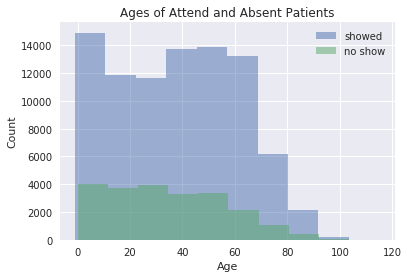

In [22]:
ax = df['Age'][attend].hist(alpha = 0.5, label='showed')
ax = df['Age'][absent].hist(alpha = 0.5, label='no show')
plot_style(xl = "Age",yl="Count",title="Ages of Attend and Absent Patients")

looks like age doesn't affect their attendance, although very young ages(kids) and from 40-60 looked like they are more likely to attend the appointment.
<br><br>
lets look at Gender

In [23]:
df['Gender'][attend].value_counts()

F    56962
M    30832
Name: Gender, dtype: int64

In [24]:
df['Gender'][absent].value_counts()

F    14455
M     7643
Name: Gender, dtype: int64

let's calculate the percentage of attendance

In [25]:
df['Gender'][absent].value_counts()['F']/df['Gender'][attend].value_counts()['F']

0.25376566834029701

In [26]:
df['Gender'][absent].value_counts()['M']/df['Gender'][attend].value_counts()['M']

0.2478918007265179

and with the visualisation its the same

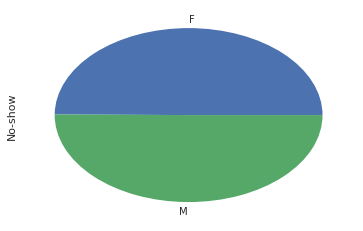

In [27]:
ax = df.groupby('Gender')['No-show'].mean().plot(kind='pie');
ax.set_title="Mean Value of Attend Male Vs Female"

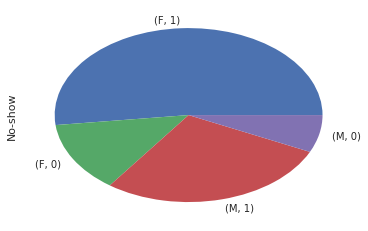

In [28]:
ax = df.groupby('Gender')['No-show'].value_counts().plot(kind='pie');
ax.set_title="count of Attend Male Vs Female"

It's very close too, so looks like Age and Gender don't affect the attendance that much
<br> But there are more females than males in the dataset
<hr>

### Research Question 2: On which days patients show more to their appointments?

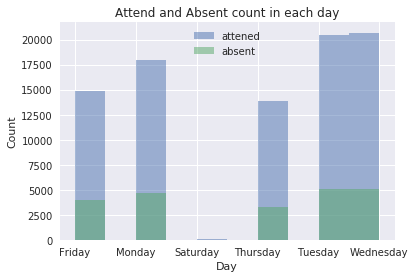

In [29]:
ax = df['appointment_dow'][attend].hist(alpha = 0.5, label='attened')
ax = df['appointment_dow'][absent].hist(alpha = 0.5, label='absent')
plot_style(xl="Day",yl="Count",title="Attend and Absent count in each day")

Looks the same each day, so days dont affect the attendace<hr>

### Research Question 3: Can we found any correlations between "the gap between the day of registration and the day of the appointments" and "the show-on the appointments"?


In [30]:
df['diff_bet_app_sch'][attend].describe()

count                      87794
mean      8 days 17:38:09.641661
std      14 days 13:08:02.004906
min              0 days 00:00:00
25%              0 days 00:00:00
50%              2 days 00:00:00
75%             12 days 00:00:00
max            179 days 00:00:00
Name: diff_bet_app_sch, dtype: object

In [31]:
df['diff_bet_app_sch'][absent].describe()

count                      22098
mean     15 days 19:28:43.269074
std      16 days 14:42:13.852774
min            -6 days +00:00:00
25%              4 days 00:00:00
50%             11 days 00:00:00
75%             23 days 00:00:00
max            179 days 00:00:00
Name: diff_bet_app_sch, dtype: object

- the mean of the attended patients is 8 days, on the other hand, it's 15 days with the absent patients<br>

So we see here that it's more likely for the patient to absent if there is a big gap between the day of registration and the day of the appointments<br>
also -6 days in absent min means there is an outlier in the data set 
<hr>

### Research Question 4: Are more messages sent to the patients increase their probabilities of showing up to the appointment?

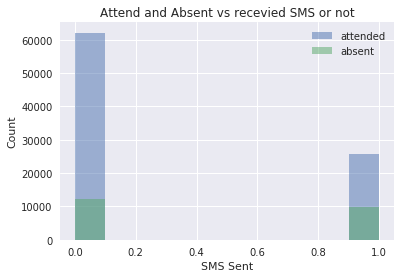

In [32]:
ax = df['SMS_received'][attend].hist(alpha = 0.5, label='attended')
ax = df['SMS_received'][absent].hist(alpha = 0.5, label='absent')
plot_style(xl="SMS Sent",yl="Count",title="Attend and Absent vs recevied SMS or not")

In [33]:
df['SMS_received'][attend].mean()

0.29270792992687428

In [34]:
df['SMS_received'][absent].mean()

0.44275500045252963

looks like there are more absent get SMS but they did't show

### Research Question 5: What about patients enrolled in the Brasilian welfare program are those more likely to show up?

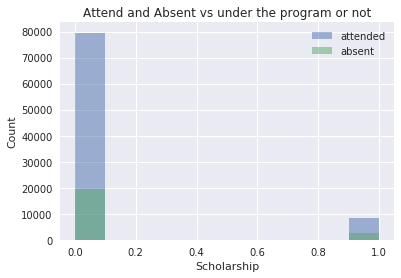

In [35]:
ax = df['Scholarship'][attend].hist(alpha = 0.5, label='attended')
ax = df['Scholarship'][absent].hist(alpha = 0.5, label='absent')
plot_style(xl="Scholarship",yl="Count",title="Attend and Absent vs under the program or not")

In [36]:
df['Scholarship'][attend].mean()

0.093913023669043444

In [37]:
df['Scholarship'][absent].mean()

0.11566657616073853

look like the same ratio however, 800k of the attendance are enrolled in the Scholarship

### Research Question 6: Does any disease affect show/no-show to the appointments?


In [38]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_date,scheduled_time,appointment_date,appointment_time,appointment_dow,diff_bet_app_sch
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08,2016-04-29,00:00:00,Friday,0 days


In [39]:
print(df['Hipertension'][attend].mean())
print(df['Hipertension'][absent].mean())

0.204433104768
0.16870305005


In [40]:
print(df['Diabetes'][attend].mean())
print(df['Diabetes'][absent].mean())

0.0737066314327
0.0643497149063


In [41]:
print(df['Alcoholism'][attend].mean())
print(df['Alcoholism'][absent].mean())

0.0304804428549
0.0302289799982


In [42]:
print(df['Handcap'][attend].mean())
print(df['Handcap'][absent].mean())

0.0226325261407
0.0201375690108


only Hipertension affect attendance by small amount

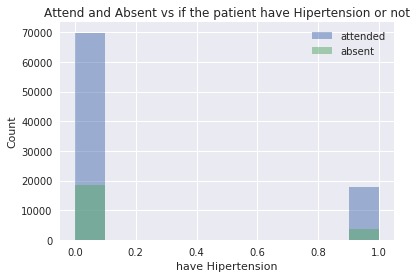

In [43]:
ax = df['Hipertension'][attend].hist(alpha = 0.5, label='attended')
ax = df['Hipertension'][absent].hist(alpha = 0.5, label='absent')
plot_style(xl="have Hipertension",yl="Count",title="Attend and Absent vs if the patient have Hipertension or not")

<a id='conclusions'></a>
## Conclusions

1. Age doesn't affect No-show as much, but it appears that kids and elders are more likely to show on the appointment
2. Gender does not have any effect, but I found that more females are going to this appointment than males
3. It's more likely for the patient to No-show if there is a big gap between the day of registration and the day of the appointments
4. more SMS messages sent to absent patients doesn't seem to affect their attendance that much
5. Scholarship enrollment Doesn't affect the No-show phenomena but it appears that most of the dataset are covered by it
6. Having a disease doesn't appear to be the reason for the No-show phenomena

#### Limitations

1. the dataset was not very easy to search into, all correlations were very small, and all the differences were the same for each case (absent vs attend) except for the Age and the gap between the day of registration and the day of the appointments
2. the dataset was very clean, although I found some outliers here and there but very small numbers as we saw -6 days and the 115-year-old guy

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0